## First Steps in QISKIT




<li> Please Visit   https://quantum-computing.ibm.com/   for getting a free account and access the IBM Quantum Computer.
    <li>Pleae Visit   https://cs.uwaterloo.ca/~watrous/QC-notes/QC-notes.pdf   for lecture notes on Quantum Computation.
        <li> Please Visit   https://qiskit.org/textbook/preface.html   to learn Quantum Computation using Qiskit

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

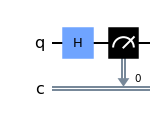

In [3]:
circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure(range(1),range(1))

circ.draw(output='mpl')

### Running On Simulators

{'0': 472, '1': 528}


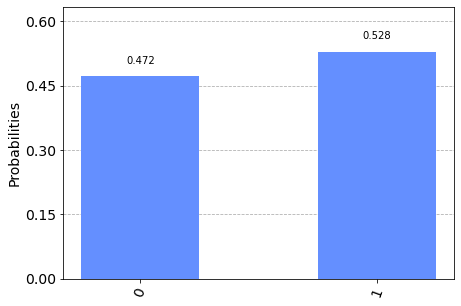

In [4]:
backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(circ, backend_sim, shots = 1000)

result_sim = job_sim.result()

counts = result_sim.get_counts(circ)

print(counts)
plot_histogram(counts)

Compute the Final State of The Vector, create a circuit with no measures

In [5]:
circ2 = QuantumCircuit(1,1)  #circuit with 1 qubit and 1 classical bit
circ2.h(0) #applying the Hadmaard gate

backend = Aer.get_backend('statevector_simulator')  #The backend is where it's running

job = execute(circ2,backend)

result = job.result()


outputstate = result.get_statevector(circ2)
print(outputstate)

[0.70710678+0.j 0.70710678+0.j]


Get The Unitary Matrix

In [6]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ2,backend)

result = job.result()

unitary = result.get_unitary()
print(unitary)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


Use the Quantum Computers


In [7]:
token = 'Enter Your Token Number Here'

In [8]:
provider = IBMQ.save_account(token)

configrc.store_credentials:WARNING:2020-12-09 19:27:38,480: Credentials already present. Set overwrite=True to overwrite.


In [9]:

provider = IBMQ.load_account()
provider.backends()

for b in provider.backends():
    print(b.status().to_dict())

C:\Users\Monit Sharma\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibmqx2', 'backend_version': '2.2.5', 'operational': True, 'pending_jobs': 324, 'status_msg': 'active'}
{'backend_name': 'ibmq_16_melbourne', 'backend_version': '2.3.3', 'operational': True, 'pending_jobs': 3656, 'status_msg': 'active'}
{'backend_name': 'ibmq_vigo', 'backend_version': '1.3.3', 'operational': True, 'pending_jobs': 108, 'status_msg': 'active'}
{'backend_name': 'ibmq_ourense', 'backend_version': '1.3.3', 'operational': True, 'pending_jobs': 526, 'status_msg': 'active'}
{'backend_name': 'ibmq_valencia', 'backend_version': '1.4.3', 'operational': True, 'pending_jobs': 7, 'status_msg': 'active'}
{'backend_name': 'ibmq_armonk', 'backend_version': '1.1.3', 'operational': True, 'pending_jobs': 32, 'status_msg': 'active'}
{'backend_name': 'ibmq_athens', 'backend_version': '1.3.3', 'operational': True, 'pending_jobs': 15, 'status_m

{'0': 4120, '1': 4072}


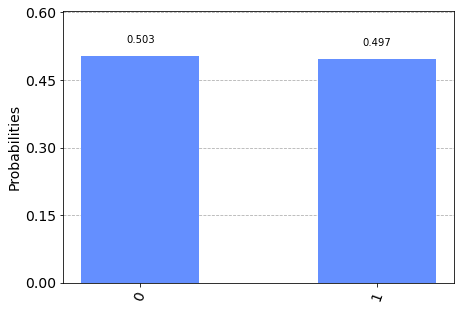

In [10]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')

job_sim = execute(circ, backend_sim, shots = 8192)

result_sim = job_sim.result()

counts = result_sim.get_counts(circ)

print(counts)
plot_histogram(counts)

### Running on Actual Quantum Computer

{'0': 4126, '1': 4066}


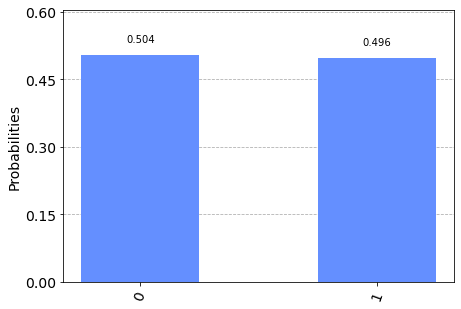

In [11]:
backend_sim = provider.get_backend('ibmq_valencia')

job_sim = execute(circ, backend_sim, shots = 8192)

result_sim = job_sim.result()

counts = result_sim.get_counts(circ)

print(counts)
plot_histogram(counts)

In [12]:
backend = provider.get_backend('ibmq_armonk')

job_exp = execute(circ, backend = backend)
job_monitor(job_exp) ## How many jobs are before it and how much is it pending

Job Status: job has successfully run


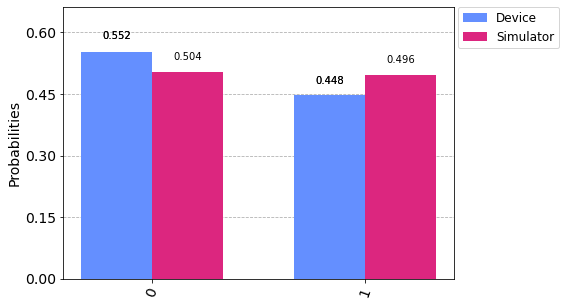

In [13]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

In [14]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

## BB84 Algorithm

<li>Applying the same Hadmard gate and measuring the qubit
<li>circ_random is the circuit drawn below

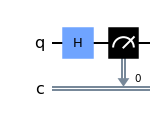

In [15]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

circ_random = QuantumCircuit(1,1) # We need qubit and one classical bit

circ_random.h(0) #We apply the H gate

circ_random.measure(range(1),range(1)) # Measure

circ_random.draw(output='mpl')

#### job Function
<li> The work is going to be on the Qasm Simulator
    <li> The Job is to execute the circ_random(the one drawn above with the H gate) , on the qasm simulator
        <li> run it around 100 times
            <li> And measure the result and store it in an array
                <li> This is what the "job" function does.


#### bits_alice Function

<li> For the value that we obtain after measuring the circ_random 100 times, we store them in variable "q"
    <li> Convert them to an integer value whilst applying int(q)
        <li> Store them all in the array "bits_alice"
            <li> Print the array

In [16]:
n = 100 # Number of bits that we are going to use

# Alice generates n random bits (some of these bits will form the key)

backend = Aer.get_backend('qasm_simulator')
job = execute(circ_random, backend, shots=n, memory = True) # We set the 'memory' parameter to true to be able to access the string of results
bits_alice = [int(q) for q in job.result().get_memory()] 
print(bits_alice)

[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]


<li>Running the same code again 
    <li> But just naming and storing them in a different array names "basis_alice"
        <li> They Provide the basis in which the measurement is being made
            

In [17]:
# Alice randomly chooses the bases in which she is going to measure

job = execute(circ_random, backend, shots=n, memory = True)
basis_alice = [int(q) for q in job.result().get_memory()] 
print(basis_alice)

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]


<li> Running the same code for bob
    <li> Bob does random measurement on the bits sent by Alice on the basis "basis_bob"

In [21]:
# Bob also chooses at random the bases in which he will measure

job = execute(circ_random, backend, shots=n, memory = True)
basis_bob = [int(q) for q in job.result().get_memory()] 
print(basis_bob)

[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]


<li> Defined an empty array "bits_bob"
    <li> It will have the bits that bob measured 
        <li> A for loop which will be executed n(100) times
            <li> It will send on the empty circuit first, with no gates and one qubit and one classical bit
                <li> For n times this loop will execute and each bit will be applied on the NOT gate and each basis on the Haadmard gate
                    <li> Same for the basis of Bob
                        <li> From that we'll measure the outcomes and will get the bits of Bob
                            <li> We'll print the Bits of Bob

In [19]:
# Now, Alice codes each bit of her initial string as a qubit and sends it to Bob, who measures in his basis

bits_bob = []

for i in range(n):
    circ_send = QuantumCircuit(1,1)
    if bits_alice[i]:  # Alice has to send '1'
        circ_send.x(0)
    if basis_alice[i]: # Alice codes in basis |+>, |->
        circ_send.h(0)
        
    # Alice sends the qubit to Bob and he measures
    
    if basis_bob[i]: # Bob has to measure in basis |+>, |->
        circ_send.h(0) 
    
    circ_send.measure(0,0)
    
    job = execute(circ_send, backend, shots = 1, memory = True)
    bits_bob.append(int(job.result().get_memory()[0]))
    
print(bits_bob)
    

[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


<li> Now as Alice has shared her set of basis used, we'll check how many bits were correctly determined by Bob
    <li> Bob is more or less 50% correct in getting the Bits

In [20]:
# Bob tells Alice the basis he used for his measurements 
# Alice confirms which of the basis are correct

key = []

for i in range(n):
    if basis_alice[i] == basis_bob[i]:
        key.append(bits_bob[i])
        
print("Key length", len(key))
print(key)

Key length 52
[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]
